## DATA PROCESSING TASK

##### This notebook presents a data engineering solution to profile, cleanse, deduplicate, and validate UK company data using the Companies House REST API. Starting from a raw CSV file (Company.csv), we standardize and enrich company records, ensuring data quality and accuracy. The final output includes a cleaned dataset, enrichment fields, and visual insights into data quality and API match success. Following steps are incuded: 
##### 1 - Import Libraries and Load Dataset
##### 2 - Profiling
##### 3 - Cleansing
##### 4 - Deduplication
##### 5 - API Data Fetch
##### 6 - Data Merge
##### 7 - Data Matching and Validation
##### 8 - Enrichment
##### 9 - Reporting and Visualization

### 1 - Import Libraries and Load Dataset

In [2]:
# 1. Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sweetviz as sv
import regex

# 2. Load Dataset
df = pd.read_csv("Company.csv")
# 3. Basic Structure
print("Dataset Shape:", df.shape)
df.info()

/home/sohail/PRAC/jups/jupyter-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset Shape: (307, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CompanyName                         307 non-null    object 
 1    CompanyNumber                      306 non-null    object 
 2   RegAddress.CareOf                   2 non-null      object 
 3   RegAddress.POBox                    5 non-null      object 
 4   RegAddress.AddressLine1             307 non-null    object 
 5    RegAddress.AddressLine2            191 non-null    object 
 6   RegAddress.PostTown                 254 non-null    object 
 7   RegAddress.County                   108 non-null    object 
 8   RegAddress.Country                  248 non-null    object 
 9   RegAddress.PostCode                 304 non-null    object 
 10  CompanyCategory                     306 non-null    object 
 11  CompanyStatus       

### 2 - Data Profiling

In [ ]:
# 4. Preview Data
report = sv.analyze(df)
report.show_html()

In [3]:
# 5. Summary Statistics (Including Strings)
df.describe(include='all')

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
count,307,306,2,5,307,191,254,108,248,304,...,0.0,0.0,1,0.0,0.0,0.0,1,1,303,239
unique,300,290,2,2,264,156,168,48,12,242,...,NaN,NaN,1,NaN,NaN,NaN,1,1,224,180
top,AIRLINEPROS NORTHERN EUROPE LTD,10399598,GW COX & CO,4385,128 CITY ROAD,DRAYTON,NORWICH,NORFOLK,ENGLAND,NR8 6HA,...,NaN,NaN,19/02/2017,NaN,NaN,NaN,37/05/3035,13/05/3034,14/03/2025,05/08/2023
freq,2,2,1,4,4,11,16,14,138,6,...,NaN,NaN,1,NaN,NaN,NaN,1,1,4,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 6. Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with Missing Values:\n", missing)

Columns with Missing Values:
 PreviousName_6.CONDATE                307
 PreviousName_3.CompanyName           307
 PreviousName_4.CompanyName           307
PreviousName_3.CONDATE                307
PreviousName_5.CONDATE                307
 PreviousName_5.CompanyName           307
 PreviousName_6.CompanyName           307
PreviousName_7.CONDATE                307
 PreviousName_7.CompanyName           307
PreviousName_4.CONDATE                307
 PreviousName_8.CompanyName           307
PreviousName_9.CONDATE                307
 PreviousName_9.CompanyName           307
PreviousName_8.CONDATE                306
PreviousName_10.CONDATE               306
 PreviousName_10.CompanyName          306
RegAddress.CareOf                     305
DissolutionDate                       305
RegAddress.POBox                      302
 PreviousName_2.CompanyName           298
 PreviousName_2.CONDATE               298
SICCode.SicText_4                     294
SICCode.SicText_3                     285
Prev

In [5]:
# 9. Top Company Names (possible duplicates)
print("Top Repeated Company Numbers:\n", df[" CompanyNumber"].value_counts().head(20))

Top Repeated Company Numbers:
  CompanyNumber
10399598    2
04466066    2
13067555    2
05717974    2
06590854    2
15733939    2
05057638    2
11044170    2
09084985    2
11044404    2
15434683    2
10899619    2
SC464056    2
08403564    2
10141677    2
15139570    2
SC644654    1
14498022    1
SC779552    1
05479162    1
Name: count, dtype: int64


In [6]:
# 9. Top Company Number (possible duplicates)
print("Top Repeated Company Names:\n", df["CompanyName"].value_counts().head(10))

Top Repeated Company Names:
 CompanyName
AIRLINEPROS NORTHERN EUROPE LTD        2
AIRLINEN LTD                           2
AIRLINGUA INTERNATIONAL LTD            2
BULLDOG PROPERTIES LTD                 2
BULLEN INVESTMENTS LIMITED             2
AIRLINERS LIVE LTD                     2
AIRLINER FOR RENT LTD                  2
AIRLINE SERVICES LIMITED               1
AIRLINE SERVICES HOLDINGS LIMITED      1
AIRLINE SERVICES COMPONENTS LIMITED    1
Name: count, dtype: int64


In [7]:
# 10. Unique Value Counts Per Column 
unique_counts = df.nunique().sort_values(ascending=False)
print("Unique Values per Column:\n", unique_counts)

Unique Values per Column:
 CompanyName                           300
 CompanyNumber                        290
URI                                   289
IncorporationDate                     288
Returns.NextDueDate                   268
RegAddress.AddressLine1               264
RegAddress.PostCode                   242
ConfStmtNextDueDate                   224
 ConfStmtLastMadeUpDate               180
RegAddress.PostTown                   168
 RegAddress.AddressLine2              156
SICCode.SicText_1                     127
Accounts.NextDueDate                  116
Returns.LastMadeUpDate                 84
Accounts.LastMadeUpDate                50
RegAddress.County                      48
SICCode.SicText_2                      33
 PreviousName_1.CompanyName            28
PreviousName_1.CONDATE                 28
Accounts.AccountCategory               19
SICCode.SicText_3                      18
Accounts.AccountRefMonth               15
Mortgages.NumMortCharges               14
Company

### 3 - Data Cleansing 

In [8]:
# 1. Drop columns where more than 90% values are NaN
threshold = 276  # 90%
null_count = df.isnull().sum()
cols_to_drop = null_count[null_count > threshold].index
print(f"\nDropping columns with more than {90}% missing values: {list(cols_to_drop)}\n")
df.drop(columns=cols_to_drop, inplace=True)


Dropping columns with more than 90% missing values: ['RegAddress.CareOf', 'RegAddress.POBox', 'DissolutionDate', 'SICCode.SicText_3', 'SICCode.SicText_4', 'PreviousName_1.CONDATE', ' PreviousName_1.CompanyName', ' PreviousName_2.CONDATE', ' PreviousName_2.CompanyName', 'PreviousName_3.CONDATE', ' PreviousName_3.CompanyName', 'PreviousName_4.CONDATE', ' PreviousName_4.CompanyName', 'PreviousName_5.CONDATE', ' PreviousName_5.CompanyName', 'PreviousName_6.CONDATE', ' PreviousName_6.CompanyName', 'PreviousName_7.CONDATE', ' PreviousName_7.CompanyName', 'PreviousName_8.CONDATE', ' PreviousName_8.CompanyName', 'PreviousName_9.CONDATE', ' PreviousName_9.CompanyName', 'PreviousName_10.CONDATE', ' PreviousName_10.CompanyName']



In [9]:
# 2. Strip whitespace from column names 
df.columns = df.columns.str.strip()

# 3. Trim whitespace in all string/object columns
str_cols = df.select_dtypes(include=['object']).columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

In [10]:
# Integer columns
cols_to_int = [
    'Accounts.AccountRefDay',
    'Accounts.AccountRefMonth',
    'Mortgages.NumMortCharges',
    'Mortgages.NumMortOutstanding',
    'Mortgages.NumMortPartSatisfied',
    'Mortgages.NumMortSatisfied',
    'LimitedPartnerships.NumGenPartners',
    'LimitedPartnerships.NumLimPartners'
]
for col in cols_to_int:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# Date columns
# 5. Convert common date fields to datetime (ignore errors)
date_columns = [col for col in df.columns if 'Date' in col]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y', errors='coerce')

## str columns
str_cols = ['CompanyName', 'CompanyNumber', 'RegAddress.AddressLine1',
       'RegAddress.AddressLine2', 'RegAddress.PostTown',
       'RegAddress.County', 'RegAddress.Country', 'RegAddress.PostCode',
       'CompanyCategory', 'CompanyStatus', 'CountryOfOrigin',
        'Accounts.AccountCategory','SICCode.SicText_1', 'SICCode.SicText_2']
for col in str_cols:
    df[col] = df[col].str.upper().str.strip().str.replace(r'\s+', ' ', regex=True)

In [11]:
        
df = df.rename(columns={
    'Returns.NextDueDate': 'ReturnsNextDueDate',
    'Returns.LastMadeUpDate': 'ReturnsLastMadeUpDate'
})

#### a - Cleaning key columns

##### - RegAddress.Country

In [12]:
df['RegAddress.Country'].value_counts()

RegAddress.Country
ENGLAND             146
UNITED KINGDOM       82
SCOTLAND              8
UK                    6
05/02/1980            1
NORTHERN IRELAND      1
GIBRALTAR             1
WALES                 1
ISLE OF MAN           1
UNITED STATES         1
Name: count, dtype: int64

In [13]:
# Define mapping rules
country_cleaning_map = {
    'ENGLAND': 'UNITED KINGDOM',
    'UK': 'UNITED KINGDOM',
    'SCOTLAND': 'UNITED KINGDOM',
    'WALES': 'UNITED KINGDOM',
    'NORTHERN IRELAND': 'UNITED KINGDOM',
    '05/02/1980': '',  # Invalid entry
}

# Apply the mapping
df['RegAddress.Country'] = df['RegAddress.Country'].replace(country_cleaning_map)

df['RegAddress.Country'].value_counts()

RegAddress.Country
UNITED KINGDOM    244
                    1
GIBRALTAR           1
ISLE OF MAN         1
UNITED STATES       1
Name: count, dtype: int64

##### - CompanyCategory

In [14]:
df['CompanyCategory'].value_counts()

CompanyCategory
PRIVATE LIMITED COMPANY                                                                      264
PRIVATE LTD COMPANY                                                                           21
PRI/LTD BY GUAR/NSC (PRIVATE, LIMITED BY GUARANTEE, NO SHARE CAPITAL)                          7
LIMITED LIABILITY PARTNERSHIP                                                                  4
OVERSEAS ENTITY                                                                                2
LIMITED PARTNERSHIP                                                                            2
OTHER COMPANY TYPE                                                                             2
PRI/LTD BY GUAR/NSC (PRIVATE, LTD BY GUARANTEE, NO SHARE CAPITAL)                              2
5                                                                                              1
PRI/LBG/NSC (PRIVATE, LIMITED BY GUARANTEE, NO SHARE CAPITAL, USE OF 'LIMITED' EXEMPTION)      1
Name: count, d

In [15]:

# Standardization mapping
category_map = {
    'PRIVATE LIMITED COMPANY': 'Private Limited Company',
    'PRIVATE LTD COMPANY': 'Private Limited Company',
    'PRI/LTD BY GUAR/NSC (PRIVATE, LIMITED BY GUARANTEE, NO SHARE CAPITAL)': 'Private Ltd by Guarantee (No Share Capital)',
    'PRI/LTD BY GUAR/NSC (PRIVATE, LTD BY GUARANTEE, NO SHARE CAPITAL)': 'Private Ltd by Guarantee (No Share Capital)',
    'PRI/LBG/NSC (PRIVATE, LIMITED BY GUARANTEE, NO SHARE CAPITAL, USE OF \'LIMITED\' EXEMPTION)': 'Ltd by Guarantee (Limited Exemption)',
    'LIMITED LIABILITY PARTNERSHIP': 'Limited Liability Partnership',
    'LIMITED PARTNERSHIP': 'Limited Partnership',
    'OVERSEAS ENTITY': 'Overseas Entity',
    'OTHER COMPANY TYPE': 'Other Company Type',
    '5': '',  # Invalid entry
}

# Apply the mapping
df['CompanyCategory'] = df['CompanyCategory'].replace(category_map)

# Optional: Capitalize uniformly
df['CompanyCategory'] = df['CompanyCategory'].str.title()

df['CompanyCategory'].value_counts()

CompanyCategory
Private Limited Company                        285
Private Ltd By Guarantee (No Share Capital)      9
Limited Liability Partnership                    4
Overseas Entity                                  2
Limited Partnership                              2
Other Company Type                               2
                                                 1
Ltd By Guarantee (Limited Exemption)             1
Name: count, dtype: int64

##### - CompanyStatus

In [16]:
df['CompanyStatus'].value_counts()

CompanyStatus
ACTIVE                             283
ACTIVE - PROPOSAL TO STRIKE OFF     15
LIQUIDATION                          5
31/03/1988                           1
VOLUNTARY ARRANGEMENT                1
ACTIVE, UK"                          1
Name: count, dtype: int64

In [17]:
# Cleaning map
status_map = {
    'ACTIVE': 'Active',
    'ACTIVE - PROPOSAL TO STRIKE OFF': 'Active (To Strike Off)',
    'ACTIVE, UK"': 'Active',
    'LIQUIDATION': 'Liquidation',
    'VOLUNTARY ARRANGEMENT': 'Voluntary Arrangement',
    '31/03/1988': '',  # Invalid entry
}

# Apply map
df['CompanyStatus'] = df['CompanyStatus'].replace(status_map)

# Optional: Title case everything
df['CompanyStatus'] = df['CompanyStatus'].str.title()
df['CompanyStatus'].value_counts()

CompanyStatus
Active                    284
Active (To Strike Off)     15
Liquidation                 5
                            1
Voluntary Arrangement       1
Name: count, dtype: int64

##### - CountryOfOrigin

In [18]:
df['CountryOfOrigin'].value_counts()

CountryOfOrigin
UNITED KINGDOM    278
UK                 22
UNITED STATES       2
31/05/1986          1
GIBRALTAR           1
ISLE OF MAN         1
Name: count, dtype: int64

In [19]:
# Define cleaning map
origin_map = {
    'UK': 'United Kingdom',
    'UNITED KINGDOM': 'United Kingdom',
    '31/05/1986': '',  # Invalid entry
}

# Apply map
df['CountryOfOrigin'] = df['CountryOfOrigin'].replace(origin_map)

# Optional: Title case for consistency
df['CountryOfOrigin'] = df['CountryOfOrigin'].str.title()

In [20]:
df['CountryOfOrigin'].value_counts()

CountryOfOrigin
United Kingdom    300
United States       2
                    1
Gibraltar           1
Isle Of Man         1
Name: count, dtype: int64

 ##### - Postal Code

In [23]:
uk_postcode_regex = r"^[A-Z]{1,2}\d{1,2}[A-Z]?\s?\d[A-Z]{2}$"
df['ValidPostcode'] = df['RegAddress.PostCode'].str.upper().str.match(uk_postcode_regex)
df['ValidPostcode'].value_counts()

ValidPostcode
True     303
False      1
Name: count, dtype: int64

In [ ]:
cols_to_int = [
    'Accounts.AccountRefDay',
    'Accounts.AccountRefMonth',
    'Mortgages.NumMortCharges',
    'Mortgages.NumMortOutstanding',
    'Mortgages.NumMortPartSatisfied',
    'Mortgages.NumMortSatisfied',
    'LimitedPartnerships.NumGenPartners',
    'LimitedPartnerships.NumLimPartners'
]


##### - Accounts.AccountRefDay

In [29]:
df['Accounts.AccountRefDay'].fillna(999).value_counts()

Accounts.AccountRefDay
31     178
30      93
29      13
28      10
999      6
5        3
38       2
23       1
39       1
Name: count, dtype: Int64

In [30]:
df['Accounts.AccountRefDay'] = df['Accounts.AccountRefDay'].fillna(999)
df['Accounts.AccountRefDay'] = df['Accounts.AccountRefDay'].apply(lambda x: 999 if x > 31 else x)
df['Accounts.AccountRefDay'].value_counts()

Accounts.AccountRefDay
31     178
30      93
29      13
28      10
999      9
5        3
23       1
Name: count, dtype: int64

##### - Accounts.AccountRefMonth

In [31]:
df['Accounts.AccountRefMonth'].fillna(999).value_counts()

Accounts.AccountRefMonth
3      52
12     38
6      31
5      25
10     23
11     22
4      21
7      20
9      20
2      16
8      16
1      15
999     6
0       1
13      1
Name: count, dtype: Int64

In [34]:
df['Accounts.AccountRefMonth'] = df['Accounts.AccountRefMonth'].fillna(999)
df['Accounts.AccountRefMonth'] = df['Accounts.AccountRefMonth'].apply(lambda x: x if 1 <= x <= 12 else 999)
df['Accounts.AccountRefMonth'].value_counts()

Accounts.AccountRefMonth
3      52
12     38
6      31
5      25
10     23
11     22
4      21
7      20
9      20
2      16
8      16
1      15
999     8
Name: count, dtype: int64

In [42]:
# 6. Show result
print("Cleansing completed. New shape:", df.shape)
# df.head()

Cleansing completed. New shape: (307, 31)


In [43]:
df_sweet = df.select_dtypes(exclude=['boolean', 'Int64'])
report = sv.analyze(df_sweet)
report.show_html()

Done! Use 'show' commands to display/save.   |██| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 4 - Deduplication

In [44]:
# Find duplicated CompanyNumber entries (including all duplicates, not just the second+)
duplicates = df[df.duplicated(subset='CompanyNumber', keep=False)]

# Sort for readability
duplicates = duplicates.sort_values(by='CompanyNumber')

# Display duplicated rows
duplicates

,CompanyName,CompanyNumber,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,...,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,ConfStmtNextDueDate,ConfStmtLastMadeUpDate,ValidPostcode
300,AIRLINE UK - THE ASSOCIATION OF UK AIRLINE LTD,04466066,35 SOUTHAMPTON BUILDINGS,NaN,NaN,NaN,UNITED KINGDOM,WC3A 1AL,Private Ltd By Guarantee (No Share Capital),Active,...,0,0,94110 - ACTIVITIES OF BUSINESS AND EMPLOYERS M...,NaN,0,0,http://business.data.gov.uk/id/company/04466066,NaT,NaT,True
227,AIRLINES UK - THE ASSOCIATION OF UK AIRLINES L...,04466066,25 SOUTHAMPTON BUILDINGS,NaN,NaN,NaN,UNITED KINGDOM,WC2A 1AL,Private Ltd By Guarantee (No Share Capital),Active,...,0,0,94110 - ACTIVITIES OF BUSINESS AND EMPLOYERS M...,NaN,0,0,http://business.data.gov.uk/id/company/04466066,2025-07-04,2024-06-20,True
230,AIRLINK 4 U LIMITED,05057638,121 SOHO HILL,HOCKLEY,BIRMINGHAM,NaN,NaN,B19 1AX,Private Limited Company,Active,...,0,0,82990 - OTHER BUSINESS SUPPORT SERVICE ACTIVIT...,NaN,0,0,http://business.data.gov.uk/id/company/05057638,2025-03-13,2024-02-27,True
303,AIRLINKS 4 U LTD,05057638,131 SOHO HILL,HOCKLEY,BIRMINGHAM,NaN,NaN,B19 1AX,Private Limited Company,Active,...,0,0,83990 - OTHER BUSINESS SUPPORT SERVICE ACTIVIT...,NaN,0,0,http://business.data.gov.uk/id/company/05057638,NaT,NaT,True
51,BULLDOG SKINCARE LIMITED,05717974,SWORD HOUSE,TOTTERIDGE ROAD,HIGH WYCOMBE,BUCKINGHAMSHIRE,UNITED KINGDOM,HP13 6DG,Private Limited Company,Active,...,0,0,46450 - WHOLESALE OF PERFUME AND COSMETICS,NaN,0,0,http://business.data.gov.uk/id/company/05717974,2025-03-08,2024-02-22,True
53,BULLDOG SKINCARE,05717974,SWORD HOUSE,TOTTERIDGE ROAD,HIGH WYCOMBE,BUCKINGHAMSHIRE,UNITED KINGDOM,HP13 6DG,Private Limited Company,Active,...,0,0,46450 - WHOLESALE OF PERFUME AND COSMETICS,NaN,0,0,http://business.data.gov.uk/id/company/05717974,2025-03-08,2024-02-22,True
306,AIRLINKS HOLIDAYS LTD,06590854,176 LAVENDER AVENUE,NaN,COVENTRY,WEST MIDLANDS,NaN,CV6 1DL,Private Limited Company,Active,...,0,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaT,NaT,True
233,AIRLINK HOLIDAYS LIMITED,06590854,176 LAVENDER AVENUE,NaN,COVENTRY,WEST MIDLANDS,NaN,CV6 1DL,Private Limited Company,Active,...,0,0,79110 - TRAVEL AGENCY ACTIVITIES,NaN,0,0,http://business.data.gov.uk/id/company/06590854,2025-05-27,2024-05-13,True
212,AIRLINE TRAVELS LIMITED,08403564,128A HIGH STREET,NaN,WEST BROMWICH,NaN,UNITED KINGDOM,B70 6JW,Private Limited Company,Active,...,0,0,79110 - TRAVEL AGENCY ACTIVITIES,NaN,0,0,http://business.data.gov.uk/id/company/08403564,2024-09-14,2023-08-31,True
285,AIRLINE TRAVELS LTD,08403564,138A HIGH STREET,NaN,WEST BROMWICH,NaN,UNITED KINGDOM,B70 6JW,Private Limited Company,Active,...,0,0,79110 - TRAVEL AGENCY ACTIVITIES,NaN,0,0,http://business.data.gov.uk/id/company/08403564,NaT,NaT,True


In [53]:
# Step 2: Group by CompanyNumber and merge fields
def merge_group(group):
    # Take the first non-null value from each column
    return group.ffill().bfill().iloc[0]

# Only apply if CompanyNumber column exists
if 'CompanyNumber' in df.columns:
    # Create merged DataFrame by group
    df_unique = df.groupby('CompanyNumber', as_index=False).apply(merge_group)

    # Reset index after groupby
    df_unique.reset_index(drop=True, inplace=True)

    print(f"Deduplication done. Reduced from {df.shape[0]} to {df_unique.shape[0]} rows.")
else:
    print("CompanyNumber column not found for deduplication.")

Deduplication done. Reduced from 306 to 290 rows.


In [54]:
df_unique = df_unique[df_unique['CompanyNumber'].notnull()]
len(df_unique)

290

### 4 - Fetch data via Rest API and pre process it

In [47]:
import base64
from requests import get
# Your actual API key
api_key = os.environ.get("MY_API_KEY")

# Encode the API key using base64 for Basic Auth
auth_string = f"{api_key}:"
auth_bytes = auth_string.encode("utf-8")
auth_base64 = base64.b64encode(auth_bytes).decode("utf-8")

# Set Authorization header manually
headers = {
    "Authorization": f"Basic {auth_base64}",
    "Accept": "application/json"
}

In [48]:
import requests
import time

# Assume df contains a column 'CompanyNumber'
company_numbers = df_unique['CompanyNumber'].dropna().unique()

api_results = []

# Loop through each CompanyNumber
for number in company_numbers:
    try:
        url = f"http://data.companieshouse.gov.uk/doc/company/{number}"
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            json_data = response.json()

            if 'primaryTopic' in json_data:
                api_results.append(json_data)
                print(f"Fetched data for CompanyNumber: {number}")
            else:
                print(f"No 'primaryTopic' found in response for {number}")

        else:
            print(f"Failed to fetch {number} — Status Code: {response.status_code}")

        time.sleep(0.2)  # be nice to the server

    except Exception as e:
        print(f"Error fetching {number}: {e}")


Fetched data for CompanyNumber: 00631975
Fetched data for CompanyNumber: 00636494
Fetched data for CompanyNumber: 00932731
Fetched data for CompanyNumber: 01005917
Fetched data for CompanyNumber: 01326345
Fetched data for CompanyNumber: 01477370
Fetched data for CompanyNumber: 01503647
Fetched data for CompanyNumber: 01542124
Fetched data for CompanyNumber: 01599516
Fetched data for CompanyNumber: 01610928
Fetched data for CompanyNumber: 01652098
Fetched data for CompanyNumber: 01685094
Fetched data for CompanyNumber: 01799475
Fetched data for CompanyNumber: 01803135
Fetched data for CompanyNumber: 01845966
Fetched data for CompanyNumber: 01891200
Fetched data for CompanyNumber: 02036613
Fetched data for CompanyNumber: 02497479
Fetched data for CompanyNumber: 02614263
Fetched data for CompanyNumber: 02637160
Fetched data for CompanyNumber: 02731165
Fetched data for CompanyNumber: 02779155
Fetched data for CompanyNumber: 03137463
Fetched data for CompanyNumber: 03138960
Fetched data for

In [50]:
# Flatten into list of rows
rows = []
for item in api_results:
    p = item['primaryTopic']
    row = {
        'CompanyName': p.get('CompanyName'),
        'CompanyNumber': p.get('CompanyNumber'),
        'AddressLine1': p.get('RegAddress', {}).get('AddressLine1'),
        'PostTown': p.get('RegAddress', {}).get('PostTown'),
        'Country': p.get('RegAddress', {}).get('Country'),
        'Postcode': p.get('RegAddress', {}).get('Postcode'),
        'CompanyCategory': p.get('CompanyCategory'),
        'CompanyStatus': p.get('CompanyStatus'),
        'CountryOfOrigin': p.get('CountryOfOrigin'),
        'IncorporationDate': p.get('IncorporationDate'),
        'AccountRefDay': p.get('Accounts', {}).get('AccountRefDay'),
        'AccountRefMonth': p.get('Accounts', {}).get('AccountRefMonth'),
        'NextAccountsDueDate': p.get('Accounts', {}).get('NextDueDate'),
        'LastAccountsMadeUpDate': p.get('Accounts', {}).get('LastMadeUpDate'),
        'ReturnsNextDueDate': p.get('Returns', {}).get('NextDueDate'),
        'ReturnsLastMadeUpDate': p.get('Returns', {}).get('LastMadeUpDate'),
        'SICCodes': ", ".join(p.get('SICCodes', {}).get('SicText', []))
    }
    rows.append(row)

# Create DataFrame
df_api = pd.DataFrame(rows)

# 2. Strip whitespace from column names (optional but helpful)
df_api.columns = df_api.columns.str.strip()

# 3. Trim whitespace in all string/object columns
str_cols = df_api.select_dtypes(include=['object']).columns
df_api[str_cols] = df_api[str_cols].apply(lambda x: x.str.strip())

# List of columns to convert 
date_columns = [
    'IncorporationDate',
    'NextAccountsDueDate',
    'LastAccountsMadeUpDate',
    'ReturnsNextDueDate',
    'ReturnsLastMadeUpDate'
]

# Apply conversion safely with error handling
for col in date_columns:
    if col in df_api.columns:
        df_api[col] = pd.to_datetime(df_api[col], format='%d/%m/%Y', errors='coerce')

cols_to_int = [
    'AccountRefDay',
    'AccountRefMonth',
   ]
for col in cols_to_int:
    if col in df_api.columns:
        df_api[col] = pd.to_numeric(df_api[col], errors='coerce').astype('Int64')


suffix = '_api'

df_api = df_api.rename(columns={
    col: col + suffix for col in df_api.columns if col != 'CompanyNumber'
})
# Show
# df_api.head()


In [51]:
df_api.shape

(289, 17)

### 5 - Merge both dfs to perform Matching and Validation

In [55]:
df_original=df_unique
# Ensure CompanyNumber is string and used as merge key
df_original['CompanyNumber'] = df_original['CompanyNumber'].astype(str).str.strip()
df_api['CompanyNumber'] = df_api['CompanyNumber'].astype(str).str.strip()

# Merge original and API data on CompanyNumber
merged_df = pd.merge(
    df_original, df_api,
    on='CompanyNumber',
    how='left'
)

### 6 - Matching

In [56]:
# Define your mappings
column_map = {
    'CompanyName': 'CompanyName_api',
    'RegAddress.AddressLine1': 'AddressLine1_api',
    'RegAddress.PostTown': 'PostTown_api',
    'RegAddress.Country': 'Country_api',
    'RegAddress.PostCode': 'Postcode_api',
    'CompanyCategory': 'CompanyCategory_api',
    'CompanyStatus': 'CompanyStatus_api',
    'CountryOfOrigin': 'CountryOfOrigin_api',
    'IncorporationDate': 'IncorporationDate_api',
    'Accounts.AccountRefDay': 'AccountRefDay_api',
    'Accounts.AccountRefMonth': 'AccountRefMonth_api',
    'Accounts.NextDueDate': 'NextAccountsDueDate_api',
    'Accounts.LastMadeUpDate': 'LastAccountsMadeUpDate_api',
    'ReturnsNextDueDate': 'ReturnsNextDueDate_api',
    'ReturnsLastMadeUpDate': 'ReturnsLastMadeUpDate_api'
}


In [57]:
validated_df = merged_df.copy()

for orig_col, api_col in column_map.items():
    qa_col = orig_col.split('.')[-1] + '_QA'  # cleaner QA column name

    def compare_values(row, orig=orig_col, api=api_col):
        val1 = row.get(orig)
        val2 = row.get(api)
        try:
            # 1. Return "Missing in both sources"
            if pd.isna(val1) and pd.isna(val2):
                return 'Missing in both sources'

            # 2. Missing in original only
            if pd.isna(val1) and pd.notna(val2):
                return 'Missing in original source'

            # 3. Missing in API only
            if pd.isna(val2) and pd.notna(val1):
                return 'Missing in api source'

            # 4. Exact match
            if val1 == val2:
                return "Matched"

            # 5. Mismatch
            return "Not Matched"
        except Exception as e:
            return "Error"

    validated_df[qa_col] = validated_df.apply(compare_values, axis=1)


In [58]:
# Show QA columns
qa_columns = [col for col in validated_df.columns if col.endswith('_QA')]
validated_df[qa_columns].sample(6)


,CompanyName_QA,AddressLine1_QA,PostTown_QA,Country_QA,PostCode_QA,CompanyCategory_QA,CompanyStatus_QA,CountryOfOrigin_QA,IncorporationDate_QA,AccountRefDay_QA,AccountRefMonth_QA,NextDueDate_QA,LastMadeUpDate_QA,ReturnsNextDueDate_QA,ReturnsLastMadeUpDate_QA
169,Matched,Matched,Matched,Not Matched,Matched,Matched,Not Matched,Matched,Matched,Matched,Matched,Missing in api source,Matched,Missing in api source,Missing in original source
22,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Not Matched,Not Matched,Not Matched,Not Matched
254,Matched,Matched,Matched,Not Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Missing in both sources,Not Matched,Missing in original source
207,Matched,Matched,Matched,Not Matched,Matched,Matched,Not Matched,Matched,Matched,Matched,Matched,Missing in api source,Missing in both sources,Missing in api source,Missing in both sources
120,Matched,Matched,Missing in original source,Not Matched,Matched,Matched,Matched,Matched,Matched,Matched,Not Matched,Not Matched,Not Matched,Not Matched,Missing in original source
196,Matched,Matched,Matched,Not Matched,Matched,Matched,Not Matched,Matched,Matched,Matched,Matched,Missing in api source,Missing in both sources,Missing in api source,Missing in original source


### 7 - Enrichment

##### - Update Missing and Mismatching values in original df with values from api results

In [59]:
for orig_col, api_col in column_map.items():
    orig_full = f"{orig_col}_original"
    api_full = f"{api_col}_api"
    qa_col = orig_col.split('.')[-1] + '_QA'

    # Only update if QA failed (i.e., 'No')
    validated_df[orig_col] = validated_df.apply(
        lambda row: row[api_col] if row.get(qa_col) in ["Not Matched","Missing in original source"] and pd.notna(row[api_col]) else row[orig_col],
        axis=1
    )

# Drop columns that end with _api or _QA
enriched_df = validated_df.drop(columns=[
    col for col in validated_df.columns if col.endswith('_api') or col.endswith('_QA')
])


##### - Add Company Age Column

In [61]:
### incorporation age 
enriched_df['IncorporationDate'] = pd.to_datetime(enriched_df['IncorporationDate'], errors='coerce')
enriched_df['CompanyAgeYears'] = ((pd.Timestamp.today() - enriched_df['IncorporationDate']).dt.days // 365)

##### - Flag Overdue Accounts

In [62]:
# Flag whether accounts or returns are overdue using NextDueDate
today = pd.Timestamp.today()
enriched_df['AccountsOverdue'] = pd.to_datetime(enriched_df['Accounts.NextDueDate'], errors='coerce') < today
enriched_df['ReturnsOverdue'] = pd.to_datetime(enriched_df['ReturnsNextDueDate'], errors='coerce') < today


##### - Add full Address column

In [63]:
## Add full address
enriched_df['FullAddress'] = enriched_df['RegAddress.AddressLine1'].fillna('') + ", " + \
                    enriched_df['RegAddress.AddressLine2'].fillna('') + ", " + \
                    enriched_df['RegAddress.PostTown'].fillna('') + ", " + \
                    enriched_df['RegAddress.PostCode'].fillna('')

##### - Extract Code and Text

In [64]:
# Extract code and text from 'SICCode.SicText_1'
df[['SICCode_1', 'SICText_1']] = df['SICCode.SicText_1'].str.extract(r'^(\d{4,})\s*-\s*(.+)$')
df[['SICCode_2', 'SICText_2']] = df['SICCode.SicText_2'].str.extract(r'^(\d{4,})\s*-\s*(.+)$')

# Optional: Handle 'NONE SUPPLIED' and other non-standard entries
df['SICCode_1'] = df['SICCode_1'].fillna('None Supplied')
df['SICText_1'] = df['SICText_1'].fillna('None Supplied')
df['SICCode_2'] = df['SICCode_2'].fillna('None Supplied')
df['SICText_2'] = df['SICText_2'].fillna('None Supplied')

### 8 - Reporting and visualisation

In [65]:
# Show how many records passed vs. failed for each field.

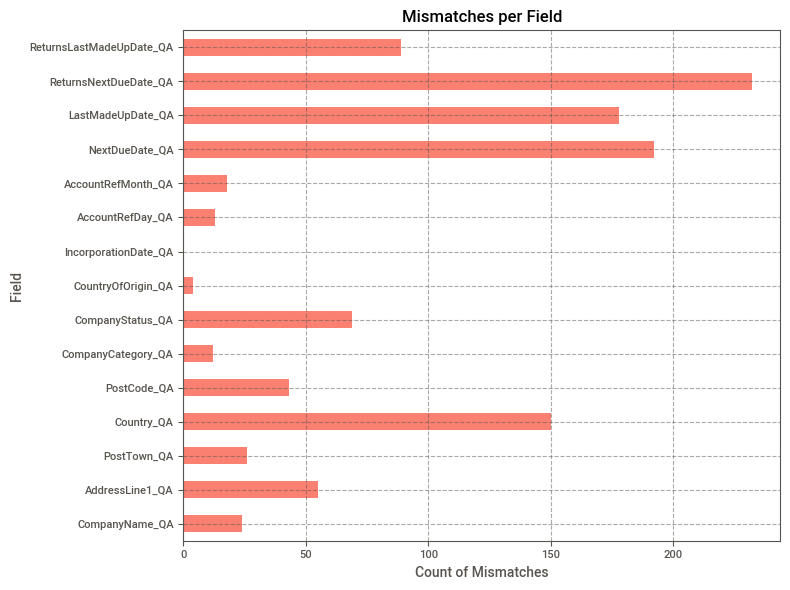

In [66]:
import matplotlib.pyplot as plt

qa_columns = [col for col in validated_df.columns if col.endswith('_QA')]

qa_summary = validated_df[qa_columns].apply(lambda col: col.value_counts().get('Not Matched', 0))
qa_summary.plot(kind='barh', color='salmon', figsize=(8, 6), title='Mismatches per Field')

plt.xlabel("Count of Mismatches")
plt.ylabel("Field")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [67]:
# Count of companies with overdue filings

In [68]:
enriched_df['AccountsOverdue'] = pd.to_datetime(enriched_df['Accounts.NextDueDate'], errors='coerce') < pd.Timestamp.today()
enriched_df['ReturnsOverdue'] = pd.to_datetime(enriched_df['ReturnsNextDueDate'], errors='coerce') < pd.Timestamp.today()

overdue_counts = enriched_df[['AccountsOverdue', 'ReturnsOverdue']].sum()
overdue_counts

AccountsOverdue    54
ReturnsOverdue     66
dtype: int64

<Axes: ylabel='RegAddress.PostTown'>

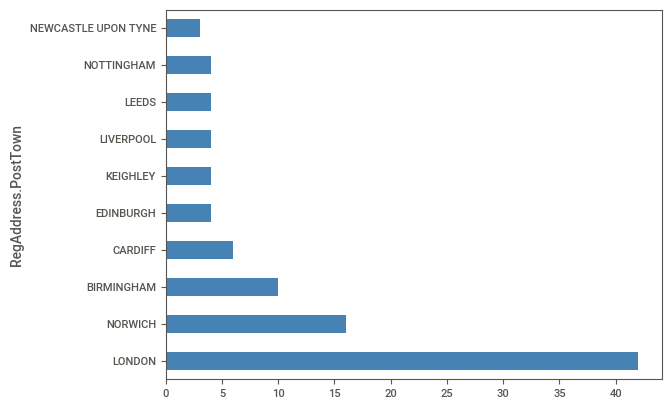

In [69]:
# Plot counts by PostTown.
enriched_df['RegAddress.PostTown'].value_counts().head(10).plot(kind='barh', color='steelblue')


<Axes: ylabel='CompanyStatus'>

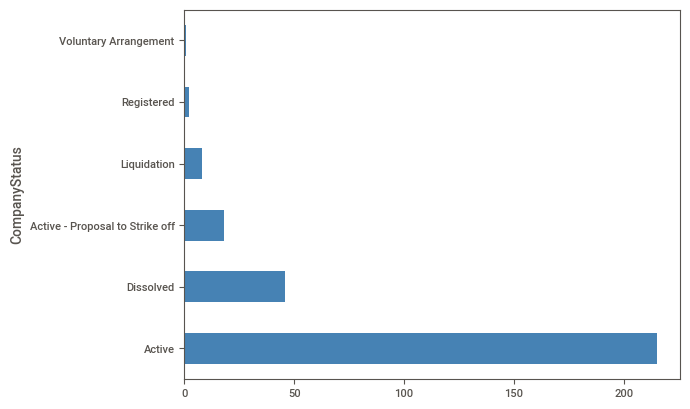

In [70]:
# Plot counts by PostTown.
enriched_df['CompanyStatus'].value_counts().head(10).plot(kind='barh', color='steelblue')


<Axes: ylabel='CompanyAgeYears'>

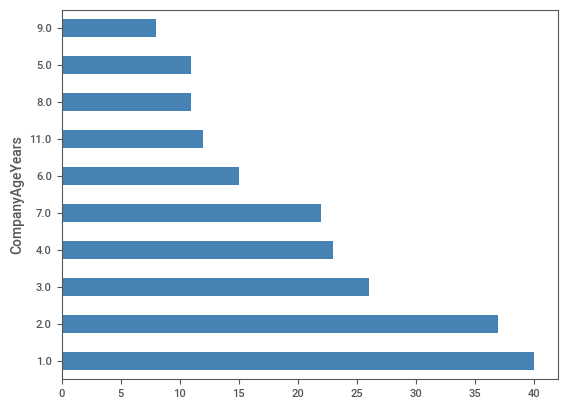

In [71]:
# Plot counts by PostTown.
enriched_df['CompanyAgeYears'].value_counts().head(10).plot(kind='barh', color='steelblue')
